In [3]:
# Install (only needed if not already installed)
# !pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt


In [4]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
def build_model(activation='relu', use_dropout=False):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation=activation))

    if use_dropout:
        model.add(Dropout(0.3))

    model.add(Dense(64, activation=activation))

    if use_dropout:
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [6]:
def plot_history(history, title_suffix=""):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
def train_model(activation='relu', use_dropout=False):
    print(f"\nTraining model with activation = {activation}, dropout = {use_dropout}")

    # Build model
    model = build_model(activation, use_dropout)

    # Train model
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10,
                        batch_size=128,
                        verbose=1)

    # Evaluate model
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Plot history
    suffix = f"({activation}, Dropout={use_dropout})"
    plot_history(history, title_suffix=suffix)

    # Save model architecture image
    model_name = f"model_{activation}_{'dropout' if use_dropout else 'nodropout'}.png"
    plot_model(model, to_file=model_name, show_shapes=True)
    print(f"Saved model architecture: {model_name}")



Training model with activation = relu, dropout = False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8314 - loss: 0.6043 - val_accuracy: 0.9540 - val_loss: 0.1579
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9588 - loss: 0.1428 - val_accuracy: 0.9610 - val_loss: 0.1300
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9714 - loss: 0.1006 - val_accuracy: 0.9711 - val_loss: 0.0940
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0721 - val_accuracy: 0.9694 - val_loss: 0.0981
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9824 - loss: 0.0586 - val_accuracy: 0.9744 - val_loss: 0.0820
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9785 - val_loss: 0.0713
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9897 - loss: 0.0349 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.

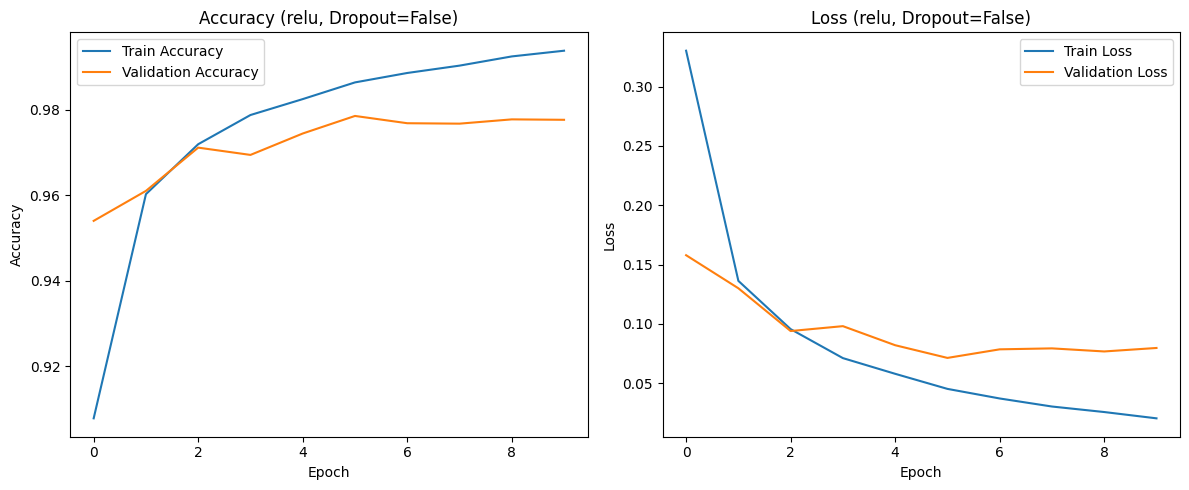

Saved model architecture: model_relu_nodropout.png

Training model with activation = relu, dropout = True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7208 - loss: 0.8853 - val_accuracy: 0.9452 - val_loss: 0.1790
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9290 - loss: 0.2444 - val_accuracy: 0.9588 - val_loss: 0.1327
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9461 - loss: 0.1811 - val_accuracy: 0.9668 - val_loss: 0.1097
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9559 - loss: 0.1521 - val_accuracy: 0.9706 - val_loss: 0.0967
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9601 - loss: 0.1315 - val_accuracy: 0.9730 - val_loss: 0.0868
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9652 - loss: 0.1159 - val_accuracy: 0.9762 - val_loss: 0.0829
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9667 - loss: 0.1091 - val_accuracy: 0.9769 - val_loss: 0.0783
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9683 - loss: 0.1052 - val_accuracy: 0.

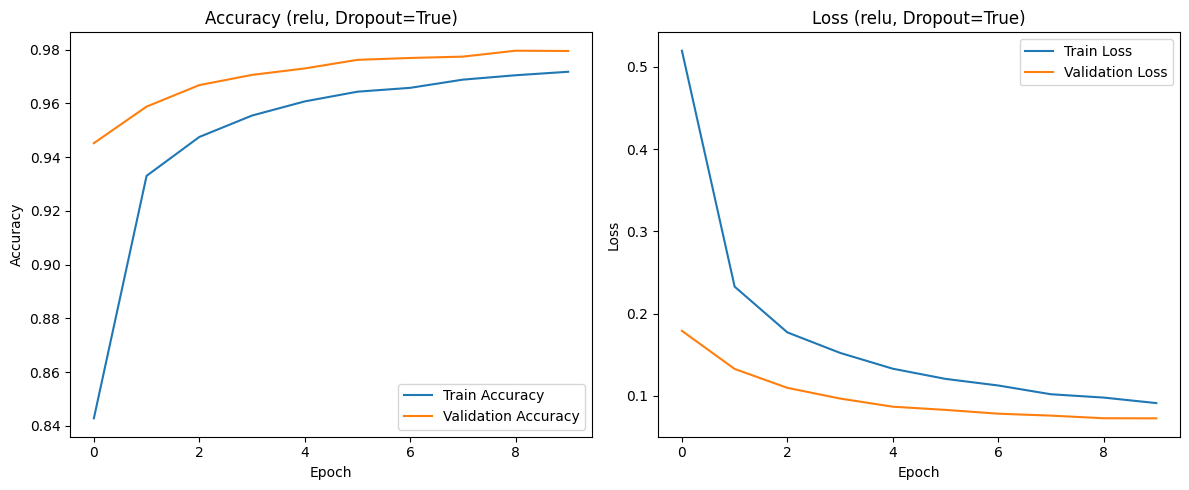

Saved model architecture: model_relu_dropout.png

Training model with activation = sigmoid, dropout = False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6618 - loss: 1.3049 - val_accuracy: 0.9112 - val_loss: 0.3255
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9183 - loss: 0.2970 - val_accuracy: 0.9341 - val_loss: 0.2255
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9384 - loss: 0.2169 - val_accuracy: 0.9476 - val_loss: 0.1771
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9528 - loss: 0.1653 - val_accuracy: 0.9543 - val_loss: 0.1504
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9613 - loss: 0.1363 - val_accuracy: 0.9604 - val_loss: 0.1275
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9667 - loss: 0.1152 - val_accuracy: 0.9669 - val_loss: 0.1098
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9728 - loss: 0.0943 - val_accuracy: 0.9673 - val_loss: 0.1026
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9776 - loss: 0.0778 - val_accuracy: 0.

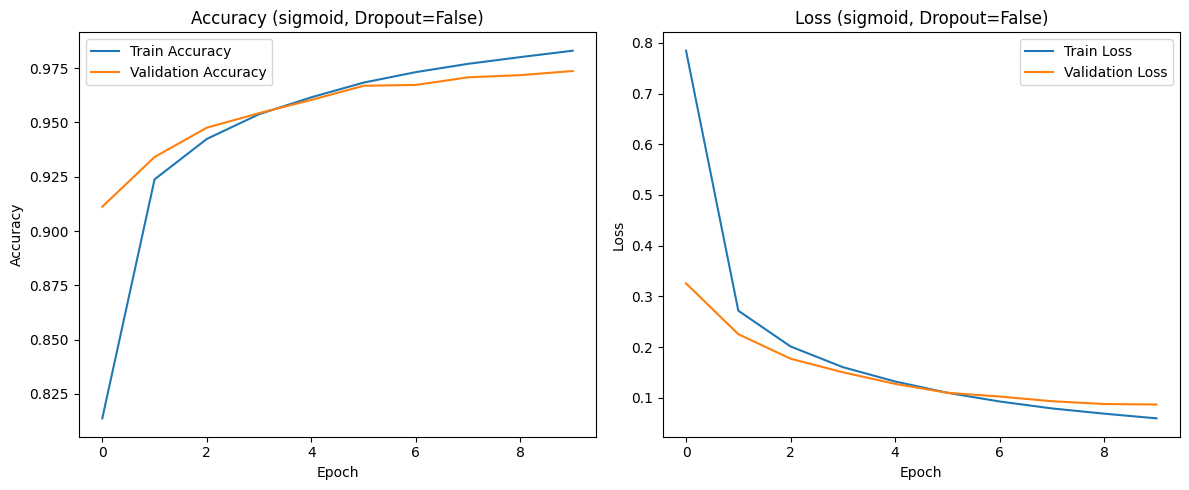

Saved model architecture: model_sigmoid_nodropout.png

Training model with activation = sigmoid, dropout = True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5089 - loss: 1.5447 - val_accuracy: 0.9047 - val_loss: 0.3779
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8758 - loss: 0.4480 - val_accuracy: 0.9237 - val_loss: 0.2636
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9021 - loss: 0.3429 - val_accuracy: 0.9352 - val_loss: 0.2151
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9185 - loss: 0.2839 - val_accuracy: 0.9455 - val_loss: 0.1863
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9286 - loss: 0.2472 - val_accuracy: 0.9502 - val_loss: 0.1662
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9361 - loss: 0.2216 - val_accuracy: 0.9556 - val_loss: 0.1478
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9449 - loss: 0.1966 - val_accuracy: 0.9594 - val_loss: 0.1332
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9469 - loss: 0.1828 - val_accuracy: 0.

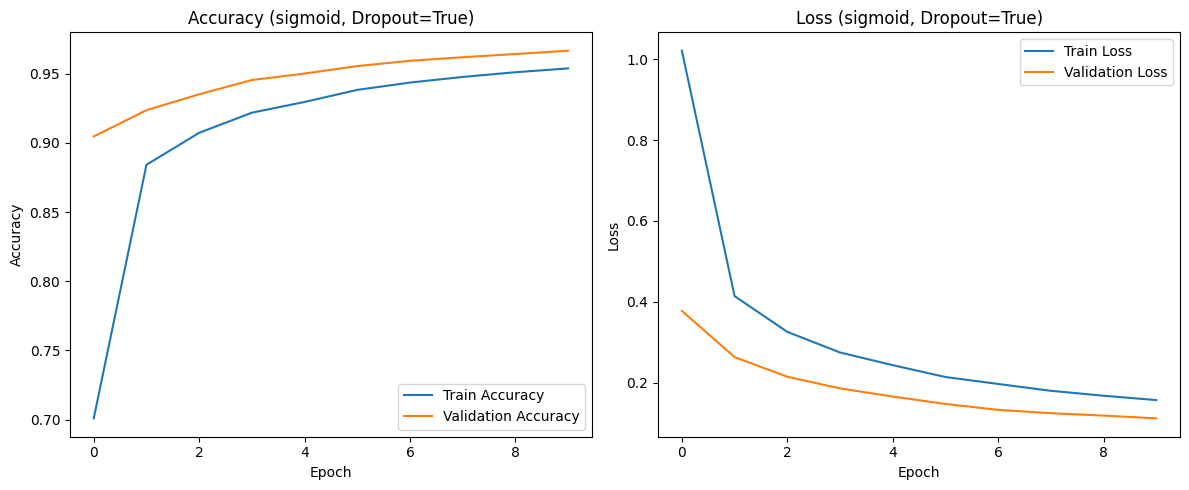

Saved model architecture: model_sigmoid_dropout.png


In [8]:
# ReLU without Dropout
train_model(activation='relu', use_dropout=False)

# ReLU with Dropout
train_model(activation='relu', use_dropout=True)

# Sigmoid without Dropout
train_model(activation='sigmoid', use_dropout=False)

# Sigmoid with Dropout
train_model(activation='sigmoid', use_dropout=True)
